<a href="https://colab.research.google.com/github/Alecia113/NLP-Lab/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#不同的预处理preprocessing；效果优劣势不同

**text wrangling** 文字凭借。 


urllib: is a package that collects several modules for working with URLs. We will use urllib.request for opening and reading URLs (See details at urllib.request).
BeautifulSoup: Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree (See details at BeautifulSoup).

例如，HTML不只包含文本。即使仅从HTML提取文本，也并非全部有意义（例如，广告）。

看一下新闻报道。我们可能只对获得本文的标题和正文感兴趣。

以下代码删除了一些不相关的标签（即脚本，样式，链接等），并显示剩余的标签。我们将主要利用两个软件包：

urllib：是一个软件包，收集了多个用于处理URL的模块。我们将urllib.request用于打开和阅读URL（请参阅urllib.request的详细信息）。
BeautifulSoup：Beautiful Soup是一个图书馆，可以轻松从网页上抓取信息。它位于HTML或XML解析器的顶部，提供用于迭代，搜索和修改解析树的Python惯用法（请参阅BeautifulSoup上的详细信息）。

In [12]:
#打开和阅读URL ； 网页抓取信息
import urllib
from bs4 import BeautifulSoup

url = "https://www.smh.com.au/national/nsw/macquarie-uni-suspends-teaching-for-10-days-to-move-learning-online-20200317-p54avs.html"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

#删除不相干 irrelevant tags （script , style, link,etc.)
for script in soup(["script","style","link","head","noscript"]):
  script.extract()    
  # rip it out (删除它) ； i.e 即； 从树中删除标签。

text = soup.get_text()
#print(text) get_text() 以字符串的形式返回标签下所有可读的text

print(soup.prettify())
#返回 beautiful soup 阶段树，到一个好的格式化统一编码段。将每个tag和每个string分行。


<!DOCTYPE html>
<html lang="en">
 <body>
  <div id="app">
   <div aria-atomic="true" aria-live="off" class="_2O3rv" id="page_announcer" tabindex="-1">
    University of Sydney to move fully online while Macquarie cancels classes
   </div>
   <div>
   </div>
   <div class="_2IxwW" role="">
    <svg aria-hidden="true" class="QMY9O _13Ea4" focusable="false" height="1em" width="1em">
     <use xlink:href="#icon-exclamation">
     </use>
    </svg>
    <p>
     We’re sorry, this service is currently unavailable. Please try again later.
    </p>
    <button class="YSssh">
     Dismiss
    </button>
   </div>
   <nav class="RbLp5">
    <a href="#sections">
     Skip to sections navigation
    </a>
    <a href="#content">
     Skip to content
    </a>
    <a href="#footer">
     Skip to footer
    </a>
   </nav>
   <header class="_21UZG noPrint">
    <div class="_2L98J">
     <ul>
      <li class="PJUwX">
       <button aria-controls="navigation" aria-expanded="false" class="_1k8VI">
        O

**Try  <  p> tag**

In [14]:
#<p> 提取文章主要内容，但不一定总是你想要的。
#findAll（） 返回具体tags  ~~ == find_all()  text = True --》 specified tags
p_tags = soup.findAll('p', text = True)
for i, p_tag in enumerate(p_tags):
  print(str(i)+str(p_tag))


0<p>We’re sorry, this service is currently unavailable. Please try again later.</p>
1<p>The University of Sydney will suspend all face-to-face teaching from Monday and move fully online while Macquarie University has cancelled classes altogether in order to make the digital transition, revealing one of its students tested positive for COVID-19.</p>
2<p>The University of Sydney's 10,000 staff members have been encouraged to work remotely to slow the spread of coronavirus, but the campus Wi-Fi network and facilities will remain open with enhanced cleaning protocols and social distancing measures.</p>
3<p>Courses with labs and practical components will be adapted for online or suspended until later in the semester while clinical placements for health students will go ahead under strict guidelines, Vice-Chancellor Michael Spence wrote to staff on Tuesday afternoon.</p>
4<p>"We’ve put a lot of effort and thought into how to do it. I think this is a tremendous opportunity. This could be an i

In [15]:
#<p> 提取文章主要内容，但不一定总是你想要的。
#findAll（） 返回具体tags  ~~ == find_all()  text = True --》 specified tags
p_tags = soup.findAll('p', text = False) #false 把一些杂七杂八的也娶进来了，
for i, p_tag in enumerate(p_tags):
  print(str(i)+str(p_tag))


0<p>We’re sorry, this service is currently unavailable. Please try again later.</p>
1<p class="CpcU1"><span>This was published <!-- -->1<!-- --> <!-- -->year<!-- --> ago</span></p>
2<p>The University of Sydney will suspend all face-to-face teaching from Monday and move fully online while Macquarie University has cancelled classes altogether in order to make the digital transition, revealing one of its students tested positive for COVID-19.</p>
3<p>The University of Sydney's 10,000 staff members have been encouraged to work remotely to slow the spread of coronavirus, but the campus Wi-Fi network and facilities will remain open with enhanced cleaning protocols and social distancing measures.</p>
4<p><span class="_2Li3P">Sydney University will move fully online from next week.</span><cite class="ojLwA"><span class="_30ROC">Credit:</span>Louise Kennerley</cite></p>
5<p>Courses with labs and practical components will be adapted for online or suspended until later in the semester while clini

**punctuation removal** 删标点

In [3]:
#use exhaustive list of symbols 完全体最笨的方法
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
  x = str(x)
  for punct in puncts:
    if punct in x:
      x = x.replace(punct, '')
  return x

text = "It's a nice day[]"
print(remove_punctuation(text))



'''【总结】
明确一个删除函数
1 输入的这个东西，必须是字符串。（转换一波，str（）
2 要把你输入的一次访问这个删除库。
3 如果在库里，就删掉，用的是， .replace(本身，替代)
4返回最终处理完的。
5文本想输入的。
6函数名（想输入的做这个函数的）
'''

Its a nice day


**这则 regular expressions**

In [4]:
#正则
#https://docs.python.org/3/library/re.html
import re
 
def remove_punctuation_re(x):
  x = re.sub(r'[^\w\s]','',x)
  return x

text = "It;s a nice day[]@$!"
print(remove_punctuation_re(text))
#去除特殊符号： r'[^\w\s]','', 输入

Its a nice day


In [ ]:
#you can find the solution from the TweetTokenizer https://www.nltk.org/_modules/nltk/tokenize/casual.html#TweetTokenizer (search "EMOTICONS" in the page)
EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""

    

**缩写contractions**

In [6]:
# These are just common English contractions. There are many edge cases. i.e. University's working on it.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

#Stopwords removal 停用词删除

In [8]:
# “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.
#lab1
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize

my_sent = "Natural Language Processing is fun but challenging."
tokens = word_tokenize(my_sent)

stop_words = sw.words()
filtered_sentence = [w for w in tokens if not w in stop_words]

print(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Natural', 'Language', 'Processing', 'fun', 'challenging', '.']


#Case-folding 大写变小写

In [10]:
text = "Hello there!"
print(text.lower()) 

#但有些不需要变小写。
text2 = "I love University of Sydney :D"
print(text2.lower())

hello there!
i love university of sydney :d


#Stemming

In [11]:
#http://text-processing.com/demo/stem/
#在演示中尝试各种类型的NLTK词干提取器
#词干提取算法的比较研究：Paper Link
#尝试用porter algorithm
from nltk.stem.porter import *
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']

singles = [stemmer.stem(plural) for plural in plurals]

# [循环内部的什么（包含一个元素）for 元素 in 遍历的集合] 【操作 循环条件】
print(singles)

['caress', 'fli', 'die', 'mule', 'deni', 'die', 'agre', 'own', 'humbl', 'size', 'meet', 'state', 'siez', 'item', 'sensat', 'tradit', 'refer', 'colon', 'plot']


#Lemmatisation 词形话，原本词形

In [30]:
#引词化是将单词的变形形式组合在一起的过程，以便可以将它们作为单个项目进行分析，由单词的引理或字典形式进行标识
# NLTK wordnet
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))

print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))

print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

#n外后面要加标识

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
cat
cactus
goose
rock
python
good
best
run
run


#Tokenisation标识化【碎片化】


In [42]:
'''
给定一个字符序列和一个定义的文档单位（单词，句子等），令牌化就是将其切成碎片（称为令牌）的任务，也许同时丢掉某些字符（例如标点符号）
在演示中尝试各种类型的NLTK令牌生成器。
NLTK Tokeniser API文档
'''

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer() #少（）了
s0 = "I am so happy :) ;)"
print(tknzr.tokenize(s0))

s0 = "I am so sad :("
print(tknzr.tokenize(s0))

s1 = "I am so sad :( :)"
#print(TweetTokenizer.tokenize(s1))
#会报错
#TypeError: tokenize() missing 1 required positional argument: 'text'
# TweetTokenizer.tokenize(文件)

['I', 'am', 'so', 'happy', ':)', ';)']
['I', 'am', 'so', 'sad', ':(']


**方法2--TreebankWordTokenizer**

In [44]:
#如Penn Treebank一样，Treebank标记生成器使用正则表达式对文本进行标记化。
#regular expressions
#分的更细
from nltk.tokenize import TreebankWordTokenizer
tknzr = TreebankWordTokenizer()

s0 = "I am so happy :) ;)"
print(tknzr.tokenize(s0))

s0 = "I am so sad :("
print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':', ')', ';', ')']
['I', 'am', 'so', 'sad', ':', '(']


#**Word Cloud** 词云，和python维基百科

In [45]:
#https://amueller.github.io/word_cloud/auto_examples/index.html
#https://pypi.org/project/wikipedia/
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp37-none-any.whl size=11686 sha256=a99cf281e0752dc02df35e756610984485a2b88912e70a5648f29a2c23361bb1
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


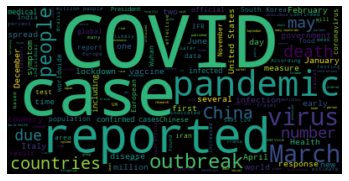

In [56]:
from wordcloud import WordCloud
import wikipedia


# Getting wikipedia contents of "COVID-19_pandemic"
text = wikipedia.page("COVID-19_pandemic").content
#print(text)
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
#print(wordcloud) #<wordcloud.wordcloud.WordCloud object at 0x7fe7c2f27290>

#生成的图要展示，需要画图matplotlib
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation = 'bilinear')#有维度 内插法
#plt.imshow(wordcloud)#有维度
plt.axis("off")#去掉维度(-0.5, 399.5, 199.5, -0.5)
plt.show()
#https://amueller.github.io/word_cloud/auto_examples/index.html
#更多的例子。

Try more word cloud examples: [Link](https://amueller.github.io/word_cloud/auto_examples/index.html)

#Saving and loading models 存储模型

In [88]:
#先训练
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class TheModelClass(nn.Module):
  def __init__(self):
    super(TheModelClass, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, input):
    output = self.linear(input)
    return output

no_of_epochs = 500
display_interval = 20
learning_rate = 0.01

#训练数据
x_training = np.asarray([[1],[2],[5],[8],[9],[12],[14],[16],[18],[20]])#列数组
y_training = np.asarray([100,200,501,780,901,1201,1399,1598,1800,2000])

x_data_torch = torch.from_numpy(x_training).float()
y_data_torch = torch.from_numpy(y_training).float()

model = TheModelClass()
optimizer = optim.SGD(model.parameters(), lr = learning_rate) #一个SGD一个Adam


for epoch in range(no_of_epochs):
  #参数梯度为0 zero the parameter gradients
  optimizer.zero_grad()

  # 向前+向后+优化器
  outputs = model(x_data_torch)
  loss = torch.sum(torch.pow(outputs-y_data_torch.view(-1,1),2))/(2*x_training.shape[0])
  #https://blog.csdn.net/weixin_42120561/article/details/102530023?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161803458016780271590464%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161803458016780271590464&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_click~default-2-102530023.first_rank_v2_pc_rank_v29&utm_term=torch.pow
  #https://blog.csdn.net/york1996/article/details/81949843?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161803444516780271517352%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161803444516780271517352&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~baidu_landing_v2~default-1-81949843.first_rank_v2_pc_rank_v29&utm_term=torch.view的用法
  #https://blog.csdn.net/m0_46653437/article/details/111309068?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161803458016780271590464%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161803458016780271590464&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_click~default-1-111309068.first_rank_v2_pc_rank_v29&utm_term=torch.pow
  loss.backward()
  optimizer.step()

  if epoch%display_interval == display_interval-1: # if epoch%次数 == 次数-1
    print('Epoch: %d, loss: %.3f' %(epoch +1, loss.item()))

Epoch: 20, loss: 28.574
Epoch: 40, loss: 27.552
Epoch: 60, loss: 26.631
Epoch: 80, loss: 25.802
Epoch: 100, loss: 25.055
Epoch: 120, loss: 24.382
Epoch: 140, loss: 23.777
Epoch: 160, loss: 23.231
Epoch: 180, loss: 22.740
Epoch: 200, loss: 22.297
Epoch: 220, loss: 21.899
Epoch: 240, loss: 21.540
Epoch: 260, loss: 21.216
Epoch: 280, loss: 20.925
Epoch: 300, loss: 20.663
Epoch: 320, loss: 20.427
Epoch: 340, loss: 20.214
Epoch: 360, loss: 20.022
Epoch: 380, loss: 19.850
Epoch: 400, loss: 19.694
Epoch: 420, loss: 19.554
Epoch: 440, loss: 19.428
Epoch: 460, loss: 19.315
Epoch: 480, loss: 19.213
Epoch: 500, loss: 19.120


In [89]:
#模型训练完要存了。 存在也给名为'filename.pt' 
torch.save(model, 'filename.pt')

**存完不得取吗**

In [90]:
#得跑完，存完，才能加载模型权重
the_saved_model = torch.load('filename.pt')
the_saved_model.eval() #展示出来eval

TheModelClass(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

**预测**

In [104]:
prediction = the_saved_model(x_data_torch).detach().numpy()
for i in range(len(y_training)):
  print('X: %d, Y_true: %d, Y_predict: %.3f'%(x_training[i][0], y_training[i],prediction[i][0]))

X: 1, Y_true: 100, Y_predict: 99.612
X: 2, Y_true: 200, Y_predict: 199.512
X: 5, Y_true: 501, Y_predict: 499.210
X: 8, Y_true: 780, Y_predict: 798.909
X: 9, Y_true: 901, Y_predict: 898.808
X: 12, Y_true: 1201, Y_predict: 1198.506
X: 14, Y_true: 1399, Y_predict: 1398.305
X: 16, Y_true: 1598, Y_predict: 1598.104
X: 18, Y_true: 1800, Y_predict: 1797.903
X: 20, Y_true: 2000, Y_predict: 1997.702


#如何upload上传模型到GD google Drive【貌似是之前研究2h标题那个】
1 mounting 挂载 google drive locally
2 创建 create a new drive file

【why？？？】为什么要上传下载？

In [ ]:
#https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

#具有隐藏状态提取：Bi-LSTM  Bi-LSTM with hidden state extraction

# Bi-LSTM with Hidden State Extraction

The folllowing image represents a Bi-LSTM for an N to 1 task. In an N to 1 task, it is usually required to extract the last hidden states of forward lstm and backward lstm and combine (concat) them. (Please check the lecture 5 recording, please!)

Bi-LSTM: Bidirectional LSTM, which means the signal propagates backward as well as forward in time.
下图表示N到1任务的Bi-LSTM。在N对1任务中，通常需要提取前向lstm和后向lstm的最后隐藏状态并将其合并（合并）。（请检查第5课的录音！）

Bi-LSTM：双向LSTM，表示信号在时间上向前和向后传播

![alt text](https://usydnlpgroup.files.wordpress.com/2020/03/bi-lstm_nto1-e1585416735686.png)

**nn.Embedding**

In [ ]:
#you will get a tensor with the shape of (train_size, seq_length, emb_dimension).
#如果上面的三个值太大 你可能会因为CPU/GPU有限而出现Out-Of-Memory(OOM)问题。
#避免太大，就要用nn.Embedding
'''
Word Embedding

翻译过来的意思就是词嵌入，通俗来讲就是将文字转换为一串数字。因为数字是计算机更容易识别的一种表达形式。
我们词嵌入的过程，就相当于是我们在给计算机制造出一本字典的过程。计算机可以通过这个字典来间接地识别文字。
词嵌入向量的意思也可以理解成：词在神经网络中的向量表示

Pytorch（0.3.1）官网的解释是：一个保存了固定字典和大小的简单查找表。这个模块常用来保存词嵌入和用下标检索它们。模块的输入是一个下标的列表，输出是对应的词嵌入。

torch.nn.Embedding(num_embeddings, embedding_dim, padding_idx=None, max_norm=None, norm_type=2, scale_grad_by_freq=False, sparse=False)

个人理解：这是一个矩阵类，里面初始化了一个随机矩阵，
矩阵的长是字典的大小，宽是用来表示字典中每个元素的属性向量，
向量的维度根据你想要表示的元素的复杂度而定。
类实例化之后可以根据字典中元素的下标来查找元素对应的向量。

不就是词表吗？

介绍：

一个简单的查找表（lookup table），存储固定字典和大小的词嵌入。
此模块通常用于存储单词嵌入并使用索引检索它们(类似数组)。
模块的输入是一个索引列表，输出是相应的词嵌入

参数：

num_embeddings - 词嵌入字典大小，即一个字典里要有多少个词。
embedding_dim - 每个词嵌入向量的大小。
变量：
~Embedding.weight（Tensor）–形状模块（num_embeddings，Embedding_dim）的可学习权重，初始化自（0，1）。
也就是说，pytorch的nn.Embedding()是可以自动学习每个词向量对应的w权重的。


num_embeddings (python:int) – 词典的大小尺寸，比如总共出现5000个词，那就输入5000。此时index为（0-4999）

embedding_dim (python:int) – 嵌入向量的维度，即用多少维来表示一个符号。

padding_idx (python:int, optional) – 填充id，比如，输入长度为100，但是每次的句子长度并不一样，后面就需要用统一的数字填充，而这里就是指定这个数字，这样，网络在遇到填充id时，就不会计算其与其它符号的相关性。（初始化为0）

max_norm (python:float, optional) – 最大范数，如果嵌入向量的范数超过了这个界限，就要进行再归一化。

norm_type (python:float, optional) – 指定利用什么范数计算，并用于对比max_norm，默认为2范数。

scale_grad_by_freq (boolean, optional) – 根据单词在mini-batch中出现的频率，对梯度进行放缩。默认为False.

sparse (bool, optional) – 若为True,则与权重矩阵相关的梯度转变为稀疏张量。


'''

#用的情感分析哦

In [ ]:
'''

引入词和标签
设置哈希表让词和index对应
将句子都转成index
下载训练集
创建嵌入查询表【为啥】

将标签转为10编码
设置超参
模型
调用模型
训练

'''

In [1]:
sentences = [['i','like','that'],
             ['i','love','it'],
             ['i','hate','that'],
             ['i','do','not','like','it']]
labels = ["Positive","Positive","Negative","Negative"]

In [2]:
#设置hashtable 哈希表
word_set = set()
for sent in sentences:
  for word in sent:
     word_set.add(word)
     ## 有时候，如果你只想把PAD和UNKOWN设为零，你可以用同一个标记来显示它们。# Sometimes you can use same token to present PAD and UNKOWN if you just want to set them as all zeros
word_set.add('[PAD]') 
word_set.add('[UNKNOWN]')
word_list = list(word_set) #不重复的token
#建议排序
word_list.sort()  #首字母排序
print(word_list)

word_index = {}
ind = 0

for word in word_list:
  word_index[word] = ind
  ind +=1
print(word_index)
'''
b = [word_index[ind]+word_index[word] for word in word_list for ind in range(10)]
print(b)
'''
#word_index = [word %: ind for word in word_list for ind in range(10)]
#print(word_index)
#https://blog.csdn.net/qq_43165880/article/details/107946497?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161803963616780366594048%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161803963616780366594048&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~baidu_landing_v2~default-2-107946497.first_rank_v2_pc_rank_v29&utm_term=python+如何把for循环写成一句话
#https://blog.csdn.net/weixin_39556702/article/details/110626146?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161803963616780366594048%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161803963616780366594048&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~baidu_landing_v2~default-1-110626146.first_rank_v2_pc_rank_v29&utm_term=python+如何把for循环写成一句话
#https://blog.csdn.net/weixin_39582724/article/details/110692007?ops_request_misc=&request_id=&biz_id=102&utm_term=python%20如何把for循环写成一句话&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-3-110692007.first_rank_v2_pc_rank_v29
#[输入的值 for1 for2]  -- 从左到右

['[PAD]', '[UNKNOWN]', 'do', 'hate', 'i', 'it', 'like', 'love', 'not', 'that']
{'[PAD]': 0, '[UNKNOWN]': 1, 'do': 2, 'hate': 3, 'i': 4, 'it': 5, 'like': 6, 'love': 7, 'not': 8, 'that': 9}


'\nb = [word_index[ind]+word_index[word] for word in word_list for ind in range(10)]\nprint(b)\n'

In [21]:
#转化句子到单词索引 convert the sentences--> word index
len_list = [len(s) for s in sentences] # 每句话的长度都是多少，然后设置成个list
seq_length = max(len_list)    #提取出最长的

def encode_and_add_padding(sentences, seq_length, word_index):#句子，最长的长度，不重复单词对应的索引
  sent_encoded = []
  for sent in sentences:
    temp_encoded = [word_index[word] for word in sent] #这是不添加PAD的时候的index索引，根据单词对应出来的
    if len(temp_encoded) < seq_length:
      temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))#word_index['[PAD]']取出括号里的index
    sent_encoded.append(temp_encoded)
  return sent_encoded

sent_encoded = encode_and_add_padding(sentences, seq_length, word_index)
print(sent_encoded)                       

[[4, 6, 9, 0, 0], [4, 7, 5, 0, 0], [4, 3, 9, 0, 0], [4, 2, 8, 6, 5]]


In [22]:
#下载 预训练 嵌入 pre_trained embedding
import gensim.downloader as api
word_emb_model = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [44]:
#创建嵌入查询表  embedding lookup table 【是传说中的W吗？】 【为什么要嵌入这个词表】
import numpy as np
emb_dim = word_emb_model.vector_size    #要训练的数据集的向量大小
emb_table = []
for i, word in enumerate(word_list):  #['[PAD]', '[UNKNOWN]', 'do', 'hate', 'i', 'it', 'like', 'love', 'not', 'that']
  if word in word_emb_model:
    emb_table.append(word_emb_model[word])
  else:
    emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
print(emb_table)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.64769995e+00  1.29030004e-01  7.69110024e-01 -3.08539998e-02
   2.75059998e-01 -4.92980003e-01  8.20599973e-01 -1.25589997e-01
   5.70680022e-01 -7.98979998e-01 -1.6

In [54]:
#介绍 sklearn.preprocessing 预处理这个包？https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#介绍的是labelencoder这个包 （标签编码） 【感觉像是去重，按顺序编码】
#使用0到n_classes-1之间的值对目标标签进行编码。该转换器应用于编码目标值，即 y，而不是输入X。
# encode target labels (value between 0 and n_classes-1)
from sklearn.preprocessing import LabelEncoder

lEnc = LabelEncoder()
lEnc.fit(labels)    #['Positive', 'Positive', 'Negative', 'Negative']
label_encoded = lEnc.transform(labels)
print(label_encoded)    #将好变为1坏变为0

[1 1 0 0]


In [63]:
#设置超参
vocab_size = len(word_list) #10--['[PAD]', '[UNKNOWN]', 'do', 'hate', 'i', 'it', 'like', 'love', 'not', 'that']
unique_labels = np.unique(labels) #标签['Negative', 'Positive'],
n_class =len(unique_labels) #2
n_hidden = 32
learning_rate = 0.01
total_epoch = 10

In [89]:
#model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

'''
使用我们创建的查询表初始化embedding层
可选：设置require_grad = False ，以使此查询表不可训练。
'''
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Bi_LSTM_Emb(nn.Module):
  def __init__(self):
    super(Bi_LSTM_Emb, self).__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)  #10,25
    self.emb.weight.data.copy_(torch.from_numpy(emb_table))  # 初始化嵌入层（用我们创建的lookup表）将数组变成了张量
    self.emb.weight.requires_grad = False # 设置requires_grad flase 是让lookup 表不训练

    self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first = True, bidirectional = True)
    self.linear = nn.Linear(n_hidden*2, n_class)

  def forward(self, x):
    x = self.emb(x) # 把嵌入变成张量get the embeded tensor
    lstm_out, (h_n,c_n) = self.lstm(x)
    hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
    z = self.linear(hidden_out)
    return z
# 函数体中间不可以加''' '''
'''
我们使用返回的h_n的形状（num_layers * num_directions, batch, hidden_size) 
张量包含了t = seq_len的 隐藏状态 
#https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
concat [合并多个数组] 合并最后隐藏状态从两个维度
   # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
# concat the last hidden state from two direction
从两个方向连接最后一个隐藏状态
'''

model = Bi_LSTM_Emb().to(device)  #移动模型到GPU move the model to GPU
criterion = nn.CrossEntropyLoss() # loss 和optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#准备input 
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)


for epoch in range(total_epoch):
  model.train() #设置flag 告诉你我们要训练了。

  #前后优化
  optimizer.zero_grad()
  outputs = model(input_torch)
  loss = criterion(outputs, targe_torch)
  loss.backward()
  optimizer.step()

  predicted = torch.argmax(outputs, -1)
  acc = accuracy_score(predicted.cpu().numpy(), targe_torch.cpu().numpy())

  print('Epoch: %d, loss: %.5f, train.acc: %.2f' %(epoch +1, loss.item(), acc))
print('Finished Training')

Epoch: 1, loss: 0.71229, train.acc: 0.50
Epoch: 2, loss: 0.64987, train.acc: 0.50
Epoch: 3, loss: 0.60364, train.acc: 0.75
Epoch: 4, loss: 0.55423, train.acc: 0.75
Epoch: 5, loss: 0.49616, train.acc: 0.75
Epoch: 6, loss: 0.43598, train.acc: 0.75
Epoch: 7, loss: 0.37492, train.acc: 1.00
Epoch: 8, loss: 0.30683, train.acc: 1.00
Epoch: 9, loss: 0.23283, train.acc: 1.00
Epoch: 10, loss: 0.15529, train.acc: 1.00
Finished Training


In [ ]:
# You can check whether model.emb.weight changed
# You can also try to comment self.emb.weight.requires_grad = False and then train the model and check again
# print(model.emb.weight)
'''
可以检查model.emb.weight 是否更改 （改变了）
尝试注释 self.emb.weight.requires_grad = False 然后训练   loss 变小了，准确度有的增加了
打印（model.emb.weight)
tensor([[-6.4904e-02, -6.9883e-02, -7.4788e-02,  7.8976e-02, -8.0532e-02,
          4.2073e-02,  1.8209e-03, -1.1636e-02, -9.6347e-03, -6.7468e-02,
         -6.8080e-03, -8.1197e-02,  6.6926e-02,  7.6285e-02, -6.9991e-02,
  
  tensor([[-7.7960e-02, -6.8196e-02,  6.6347e-02, -2.2778e-02, -6.8060e-02,
         -6.9652e-02, -5.1548e-02,  7.5316e-02, -9.3826e-02, -7.6341e-02,
         -1.2837e-02,  7.9841e-02,  2.2992e-02, -5.4389e-02, -7.9288e-02,
         -9.0643e-03, -6.2363e-02,  2.4288e-02,  3.9264e-02,  2.3915e-02,
         -7.9101e-02, -2.2036e-02, -1.3388e-02,  2.9579e-02,  3.8787e-02],
        [ 0.0000e+00,  0.0000e+
'''


In [92]:
#model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

'''
使用我们创建的查询表初始化embedding层
可选：设置require_grad = False ，以使此查询表不可训练。
'''
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(model.emb.weight)

class Bi_LSTM_Emb(nn.Module):
  def __init__(self):
    super(Bi_LSTM_Emb, self).__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)  #10,25
    self.emb.weight.data.copy_(torch.from_numpy(emb_table))  # 初始化嵌入层（用我们创建的lookup表）将数组变成了张量
    #self.emb.weight.requires_grad = False # 设置requires_grad flase 是让lookup 表不训练

    self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first = True, bidirectional = True)
    self.linear = nn.Linear(n_hidden*2, n_class)

  def forward(self, x):
    x = self.emb(x) # 把嵌入变成张量get the embeded tensor
    lstm_out, (h_n,c_n) = self.lstm(x)
    hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
    z = self.linear(hidden_out)
    return z
# 函数体中间不可以加''' '''
'''
我们使用返回的h_n的形状（num_layers * num_directions, batch, hidden_size) 
张量包含了t = seq_len的 隐藏状态 
#https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
concat [合并多个数组] 合并最后隐藏状态从两个维度
   # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
# concat the last hidden state from two direction
从两个方向连接最后一个隐藏状态
'''

model = Bi_LSTM_Emb().to(device)  #移动模型到GPU move the model to GPU
criterion = nn.CrossEntropyLoss() # loss 和optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#准备input 
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)


for epoch in range(total_epoch):
  model.train() #设置flag 告诉你我们要训练了。

  #前后优化
  optimizer.zero_grad()
  outputs = model(input_torch)
  loss = criterion(outputs, targe_torch)
  loss.backward()
  optimizer.step()

  predicted = torch.argmax(outputs, -1)
  acc = accuracy_score(predicted.cpu().numpy(), targe_torch.cpu().numpy())

  print('Epoch: %d, loss: %.5f, train.acc: %.2f' %(epoch +1, loss.item(), acc))
print('Finished Training')
print(model.emb.weight)

Parameter containing:
tensor([[-7.7960e-02, -6.8196e-02,  6.6347e-02, -2.2778e-02, -6.8060e-02,
         -6.9652e-02, -5.1548e-02,  7.5316e-02, -9.3826e-02, -7.6341e-02,
         -1.2837e-02,  7.9841e-02,  2.2992e-02, -5.4389e-02, -7.9288e-02,
         -9.0643e-03, -6.2363e-02,  2.4288e-02,  3.9264e-02,  2.3915e-02,
         -7.9101e-02, -2.2036e-02, -1.3388e-02,  2.9579e-02,  3.8787e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.7367e+00,  2.1807e-01,  6.8131e-01, -9.3634e-02,  3.6060e-01,
         -5.5018e-01,  7.7690e-01, -2.1510e-01,  6.1257e-01, -7.1227e-01,
         -1.7301e+00, -1.8253e+00, -5.3394e+00, -1.2652e+00, -6.4820e-01,
         -9.93

TEST


In [76]:
#11.7
emb = nn.Embedding(vocab_size, emb_dim)
emb.weight.data.copy_(torch.from_numpy(emb_table))

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.6477e+00,  1.2903e-01,  7.6911e-01, -3.0854e-02,  2.7506e-01,
         -4.9298e-01,  8.2060e-01, -1.2559e-01,  5.7068e-01, -7.9898e-01,
         -1.6912e+00, -1.7656e+00, -5.3186e+00, -1.2511e+00, -7.3013e-01,
         -9.0697e-01, -1.0932e+00, -

In [74]:
#11.6
torch.from_numpy(emb_table)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.6477e+00,  1.2903e-01,  7.6911e-01, -3.0854e-02,  2.7506e-01,
         -4.9298e-01,  8.2060e-01, -1.2559e-01,  5.7068e-01, -7.9898e-01,
         -1.6912e+00, -1.7656e+00, -5.3186e+00, -1.2511e+00, -7.3013e-01,
         -9.0697e-01, -1.0932e+00, -

In [70]:
#11.5
emb_table.shape

(10, 25)

In [69]:
#11.4
emb_table

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
    

In [67]:
#11.3
nn.Embedding(vocab_size, emb_dim)

Embedding(10, 25)

In [66]:
#11.2
emb_dim

25

In [65]:
#11.1
vocab_size

10

In [62]:
#10.4
n_class

2

In [60]:
#10.3
unique_labels #标签['Negative', 'Positive'],

array(['Negative', 'Positive'], dtype='<U8')

In [58]:
#10.2
word_list

['[PAD]', '[UNKNOWN]', 'do', 'hate', 'i', 'it', 'like', 'love', 'not', 'that']

In [56]:
#10.1
vocab_size  #10

10

In [53]:
#9.3
label_encoded

array([1, 1, 0, 0])

In [51]:
#9.2
labels

['Positive', 'Positive', 'Negative', 'Negative']

In [50]:
#9.1
lEnc #前三LabelEncoder()

LabelEncoder()

In [45]:
#8.8
emb_table.shape #(10, 25) 十行，没行中有25个值

(10, 25)

In [42]:
#8.7
emb_table

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 array([ 1.6477e+00,  1.2903e-01,  7.6911e-01, -3.0854e-02,  2.7506e-01,
        -4.9298e-01,  8.2060e-01, -1.2559e-01,  5.7068e-01, -7.9898e-01,
        -1.6912e+00, -1.7656e+00, -5.3186e+00, -1.2511e+00, -7.3013e-01,
        -9.0697e-01, -1.0932e+00, -5.3634e-01,  1.7967e-01, -1.6247e+00,
        -2.9176e-03,  1.3184e+00,  4.5594e-01,  3.6820e-01,  8.7591e-01],
       dtype=float32),
 array([ 6.6523e-01,  7.3776e-01,  2.2958e-02,  1.3177e-01, -7.0630e-01,
         6.4642e-01,  2.1068e+00, -5.6058e-01, -7.0352e-01,  8.3807e-01,
        -1.1425e+00, -9.2725e-02, -4.4378e+00, -7.6222e-01,  1.8249e-01,
         7.2472e-01,  6.0011e-03, -7.3652e-01,  2.3592e-03, -3.4830e-01,
         6.5230e-01,  1.0148e+00,  1.9504e-01, -3.1584e-01, -5.0971e-01],
       dtype=float32),
 array([-0.26079 ,  0.59108 ,  0.61622 , -0.70368 , -0.85159 , -0.

In [40]:
#8.6
word

'that'

In [39]:
#8.5
emb_table #8
'''
[array([ 1.6477e+00,  1.2903e-01,  7.6911e-01, -3.0854e-02,  2.7506e-01,
        -4.9298e-01,  8.2060e-01, -1.2559e-01,  5.7068e-01, -7.9898e-01,
        -1.6912e+00, -1.7656e+00, -5.3186e+00, -1.2511e+00, -7.3013e-01,
        -9.0697e-01, -1.0932e+00, -5.3634e-01,  1.7967e-01, -1.6247e+00,
        -2.9176e-03,  1.3184e+00,  4.5594e-01,  3.6820e-01,  8.7591e-01],
       dtype=float32),
 array([ 6.6523e-01,  7.3776e-01,  2.2958e-02,  1.3177e-01, -7.0630e-01,
         6.4642e-01,  2.1068e+00, -5.6058e-01, -7.0352e-01,  8.3807e-01,
        -1.1425e+00, -9.2725e-02, -4.4378e+00, -7.6222e-01,  1.8249e-01,
         7.2472e-01,  6.0011e-03, -7.3652e-01,  2.3592e-03, -3.4830e-01,
         6.5230e-01,  1.0148e+00,  1.9504e-01, -3.1584e-01, -5.0971e-01],
       dtype=float32),
 array([-0.26079 ,  0.59108 ,  0.61622 , -0.70368 , -0.85159 , -0.23238 ,
         1.0481  ,  0.066642, -0.54907 ,  0.70047 , -0.87221 , -0.013954,
        -5.9671  , -0.43106 , -0.9154  ,  0.53744 ,  0.57099 , -0.27181 ,
        -0.84178 , -0.59682 ,  0.4516  ,  0.34097 ,  0.076869,  0.2284  ,
         0.2758  ], dtype=float32),
 array([ 0.16758 ,  0.21434 , -0.093086,  0.16379 , -0.60001 , -0.037103,
         1.8577  , -0.24306 , -0.44864 ,  0.28734 , -0.43609 ,  1.0839  ,
        -6.0385  , -0.14872 ,  0.31843 ,  0.08263 ,  0.47562 , -0.5009  ,
        -0.099384, -0.18034 , -0.10614 ,  0.15238 ,  0.32532 ,  0.73795 ,
        -0.40859 ], dtype=float32),
 array([ 0.068004 ,  0.10737  ,  0.61292  ,  0.35446  , -0.28576  ,
         0.44095  ,  1.7574   , -0.0079057, -0.66561  ,  0.20433  ,
        -0.51421  ,  0.46797  , -5.349    , -0.99746  , -0.12069  ,
         0.11433  ,  0.37355  , -0.97219  , -0.089747 , -0.14982  ,
         0.34141  ,  0.58987  ,  0.51226  , -0.06509  , -0.068817 ],
       dtype=float32),
 array([-0.62645 , -0.082389,  0.070538,  0.5782  , -0.87199 , -0.14816 ,
         2.2315  ,  0.98573 , -1.3154  , -0.34921 , -0.8847  ,  0.14585 ,
        -4.97    , -0.73369 , -0.94359 ,  0.035859, -0.026733, -0.77538 ,
        -0.30014 ,  0.48853 , -0.16678 , -0.016651, -0.53164 ,  0.64236 ,
        -0.10922 ], dtype=float32),
 array([ 0.35377 ,  0.32604 , -0.22682 , -0.32412 , -0.18555 ,  0.1486  ,
         1.3914  , -0.65154 , -0.38197 ,  0.17129 , -0.43405 ,  0.39154 ,
        -5.7918  , -0.20201 , -0.23216 , -0.10638 ,  0.070835, -0.2146  ,
        -0.094385, -1.0851  ,  0.61683 ,  0.82184 , -0.35102 ,  0.19177 ,
        -0.43818 ], dtype=float32),
 array([ 0.20823 ,  0.22476 , -0.070949,  0.23917 , -0.36076 , -0.23443 ,
         1.8633  , -0.4573  , -0.40894 , -0.055079, -0.11599 ,  1.0568  ,
        -6.2614  , -0.24912 ,  0.37123 ,  0.21891 ,  0.67926 , -0.35585 ,
         0.18441 , -0.11821 ,  0.58806 ,  0.59916 ,  0.40883 ,  0.15874 ,
        -0.55338 ], dtype=float32)]

        '''

[array([ 1.6477e+00,  1.2903e-01,  7.6911e-01, -3.0854e-02,  2.7506e-01,
        -4.9298e-01,  8.2060e-01, -1.2559e-01,  5.7068e-01, -7.9898e-01,
        -1.6912e+00, -1.7656e+00, -5.3186e+00, -1.2511e+00, -7.3013e-01,
        -9.0697e-01, -1.0932e+00, -5.3634e-01,  1.7967e-01, -1.6247e+00,
        -2.9176e-03,  1.3184e+00,  4.5594e-01,  3.6820e-01,  8.7591e-01],
       dtype=float32),
 array([ 6.6523e-01,  7.3776e-01,  2.2958e-02,  1.3177e-01, -7.0630e-01,
         6.4642e-01,  2.1068e+00, -5.6058e-01, -7.0352e-01,  8.3807e-01,
        -1.1425e+00, -9.2725e-02, -4.4378e+00, -7.6222e-01,  1.8249e-01,
         7.2472e-01,  6.0011e-03, -7.3652e-01,  2.3592e-03, -3.4830e-01,
         6.5230e-01,  1.0148e+00,  1.9504e-01, -3.1584e-01, -5.0971e-01],
       dtype=float32),
 array([-0.26079 ,  0.59108 ,  0.61622 , -0.70368 , -0.85159 , -0.23238 ,
         1.0481  ,  0.066642, -0.54907 ,  0.70047 , -0.87221 , -0.013954,
        -5.9671  , -0.43106 , -0.9154  ,  0.53744 ,  0.57099 , -0.27181 ,


In [38]:
#8.4
word_emb_model#AttributeError: 'Word2VecKeyedVectors' object has no attribute 'shape'

In [34]:
##8.3
word_emb_model[word]  #25 ;展现方法【word】***

array([ 0.20823 ,  0.22476 , -0.070949,  0.23917 , -0.36076 , -0.23443 ,
        1.8633  , -0.4573  , -0.40894 , -0.055079, -0.11599 ,  1.0568  ,
       -6.2614  , -0.24912 ,  0.37123 ,  0.21891 ,  0.67926 , -0.35585 ,
        0.18441 , -0.11821 ,  0.58806 ,  0.59916 ,  0.40883 ,  0.15874 ,
       -0.55338 ], dtype=float32)

In [31]:
#8.2
enumerate(word_list)
word_list


['[PAD]', '[UNKNOWN]', 'do', 'hate', 'i', 'it', 'like', 'love', 'not', 'that']

In [25]:
#8.1
emb_dim

25

In [20]:
#7.12 函数就是为了实现这个，只不过写成了函数
#转化句子到单词索引 convert the sentences--> word index
len_list = [len(s) for s in sentences] # 每句话的长度都是多少，然后设置成个list
seq_length = max(len_list)    #提取出最长的

sent_encoded = []
for sent in sentences:
  temp_encoded = [word_index[word] for word in sent] #这是不添加PAD的时候的index索引，根据单词对应出来的
  if len(temp_encoded) < seq_length:
    temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))#word_index['[PAD]']取出括号里的index
  sent_encoded.append(temp_encoded)
print(sent_encoded)    


[[4, 6, 9, 0, 0], [4, 7, 5, 0, 0], [4, 3, 9, 0, 0], [4, 2, 8, 6, 5]]


In [17]:
#7.11
word_index['[PAD]']

0

In [11]:
#7.10
len_list = [len(s) for s in sentences] # 每句话的长度都是多少，然后设置成个list
seq_length = max(len_list)    #提取出最长的
sent_encoded = []
for sent in sentences:
  temp_encoded = [word_index[word] for word in sent] #这是不添加PAD的时候的index索引，根据单词对应出来的
  print(temp_encoded)

[4, 6, 9]
[4, 7, 5]
[4, 3, 9]
[4, 2, 8, 6, 5]


In [16]:
#7.9
temp_encoded

[4, 2, 8, 6, 5]

In [15]:
#
word_index[word]
word_index

{'[PAD]': 0,
 '[UNKNOWN]': 1,
 'do': 2,
 'hate': 3,
 'i': 4,
 'it': 5,
 'like': 6,
 'love': 7,
 'not': 8,
 'that': 9}

In [13]:
#7.7
sent

['i', 'do', 'not', 'like', 'it']

In [12]:
#7.6
word

'that'

In [9]:
#7.5
word_index

{'[PAD]': 0,
 '[UNKNOWN]': 1,
 'do': 2,
 'hate': 3,
 'i': 4,
 'it': 5,
 'like': 6,
 'love': 7,
 'not': 8,
 'that': 9}

In [8]:
#7.4
seq_length

5

In [6]:
#7.3
for s in sentences:
  print(s)

['i', 'like', 'that']
['i', 'love', 'it']
['i', 'hate', 'that']
['i', 'do', 'not', 'like', 'it']


In [5]:
#7.2
sentences

[['i', 'like', 'that'],
 ['i', 'love', 'it'],
 ['i', 'hate', 'that'],
 ['i', 'do', 'not', 'like', 'it']]

In [4]:
#7.1
len_list

[3, 3, 3, 5]

In [115]:

#6.2
#设置hashtable 哈希表
word_set = set()
for sent in sentences:
  for word in sent:
     word_set.add(word)
     ## 有时候，如果你只想把PAD和UNKOWN设为零，你可以用同一个标记来显示它们。# Sometimes you can use same token to present PAD and UNKOWN if you just want to set them as all zeros
word_set.add('[PAD]') 
word_set.add('[UNKNOWN]')
word_list = list(word_set)

word_index = {}

ind = 0
word_index[word] = ind
print(word_index)

{'it': 0}


In [108]:
#6.1
word_list

['hate', 'not', 'like', 'love', '[UNKNOWN]', 'that', '[PAD]', 'do', 'i', 'it']

stemming 和limm 语素化是将一个词的转折形式归纳在一起的过程，这样就可以将它们作为一个单独的项目进行分析，并通过该词的词素或词典形式加以识别。
stem要的是词根。 limm是将退回原型

In [102]:
x_training[1]#这是一个从外往里去洋葱扒皮的过程

array([2])

In [96]:
#5.5
x_training

array([[ 1],
       [ 2],
       [ 5],
       [ 8],
       [ 9],
       [12],
       [14],
       [16],
       [18],
       [20]])

In [94]:
#5.4
the_saved_model(x_data_torch).detach().numpy() #就是单纯的边array

array([[  99.61241],
       [ 199.51186],
       [ 499.2102 ],
       [ 798.9085 ],
       [ 898.8079 ],
       [1198.5063 ],
       [1398.3053 ],
       [1598.1041 ],
       [1797.903  ],
       [1997.7019 ]], dtype=float32)

In [95]:
#5.3 
#the_saved_model(x_data_torch).numpy()
#RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
#RuntimeError: 不能在需要grad的Tensor上调用numpy()。使用 tensor.detach().numpy()代替。


In [92]:
#5.2 detach 分离
the_saved_model(x_data_torch).detach()
'''
tensor([[  99.6124],
        [ 199.5119],
        [ 499.2102],
        [ 798.9085],
        [ 898.8079],
        [1198.5063],
        [1398.3053],
        [1598.1041],
        [1797.9030],
        [1997.7019]])
        '''

tensor([[  99.6124],
        [ 199.5119],
        [ 499.2102],
        [ 798.9085],
        [ 898.8079],
        [1198.5063],
        [1398.3053],
        [1598.1041],
        [1797.9030],
        [1997.7019]])

In [91]:
#5.1
the_saved_model(x_data_torch)
'''
tensor([[  99.6124],
        [ 199.5119],
        [ 499.2102],
        [ 798.9085],
        [ 898.8079],
        [1198.5063],
        [1398.3053],
        [1598.1041],
        [1797.9030],
        [1997.7019]], grad_fn=<AddmmBackward>)
        '''

tensor([[  99.6124],
        [ 199.5119],
        [ 499.2102],
        [ 798.9085],
        [ 898.8079],
        [1198.5063],
        [1398.3053],
        [1598.1041],
        [1797.9030],
        [1997.7019]], grad_fn=<AddmmBackward>)

In [ ]:
#(y1-y2)^2/ 2x

In [84]:
#4.13
#torch.pow()对输入的每分量求幂次运算
torch.pow(outputs-y_data_torch.view(-1,1),2)
'''
tensor([[  10016.6562],
        [  40360.9922],
        [ 254371.0156],
        [ 617487.5000],
        [ 823775.6875],
        [1464275.7500],
        [1987273.8750],
        [2593199.5000],
        [3290508.2500],
        [4062684.5000]], grad_fn=<PowBackward0>)
        '''

tensor([[  10016.6562],
        [  40360.9922],
        [ 254371.0156],
        [ 617487.5000],
        [ 823775.6875],
        [1464275.7500],
        [1987273.8750],
        [2593199.5000],
        [3290508.2500],
        [4062684.5000]], grad_fn=<PowBackward0>)

In [83]:
#4.12
outputs-y_data_torch.view(-1,1)
'''
tensor([[ -100.0832],
        [ -200.9005],
        [ -504.3521],
        [ -785.8037],
        [ -907.6209],
        [-1210.0726],
        [-1409.7070],
        [-1610.3414],
        [-1813.9758],
        [-2015.6102]], grad_fn=<SubBackward0>)
        '''

tensor([[ -100.0832],
        [ -200.9005],
        [ -504.3521],
        [ -785.8037],
        [ -907.6209],
        [-1210.0726],
        [-1409.7070],
        [-1610.3414],
        [-1813.9758],
        [-2015.6102]], grad_fn=<SubBackward0>)

In [82]:
#4.11
outputs
'''
tensor([[ -0.0832],
        [ -0.9005],
        [ -3.3521],
        [ -5.8037],
        [ -6.6209],
        [ -9.0726],
        [-10.7070],
        [-12.3414],
        [-13.9758],
        [-15.6103]], grad_fn=<AddmmBackward>)
        '''

tensor([[ -0.0832],
        [ -0.9005],
        [ -3.3521],
        [ -5.8037],
        [ -6.6209],
        [ -9.0726],
        [-10.7070],
        [-12.3414],
        [-13.9758],
        [-15.6103]], grad_fn=<AddmmBackward>)

In [81]:
#4.10
y_data_torch.view(-1,1)#相当于numpy中resize（）的功能
'''
tensor([[ 100.],
        [ 200.],
        [ 501.],
        [ 780.],
        [ 901.],
        [1201.],
        [1399.],
        [1598.],
        [1800.],
        [2000.]])
        '''
        

tensor([[ 100.],
        [ 200.],
        [ 501.],
        [ 780.],
        [ 901.],
        [1201.],
        [1399.],
        [1598.],
        [1800.],
        [2000.]])

In [75]:
#4.9
y_data_torch.view(-1,2)  
'''
tensor([[ 100.,  200.],
        [ 501.,  780.],
        [ 901., 1201.],
        [1399., 1598.],
        [1800., 2000.]])

        '''

tensor([[ 100.,  200.],
        [ 501.,  780.],
        [ 901., 1201.],
        [1399., 1598.],
        [1800., 2000.]])

In [69]:
#4.8
y_data_torch.view(-1)

tensor([ 100.,  200.,  501.,  780.,  901., 1201., 1399., 1598., 1800., 2000.])

In [67]:
#4.7
y_data_torch

tensor([ 100.,  200.,  501.,  780.,  901., 1201., 1399., 1598., 1800., 2000.])

In [66]:
#4.6
outputs
'''
tensor([[ -0.0832],
        [ -0.9005],
        [ -3.3521],
        [ -5.8037],
        [ -6.6209],
        [ -9.0726],
        [-10.7070],
        [-12.3414],
        [-13.9758],
        [-15.6103]], grad_fn=<AddmmBackward>)
        '''

tensor([[ -0.0832],
        [ -0.9005],
        [ -3.3521],
        [ -5.8037],
        [ -6.6209],
        [ -9.0726],
        [-10.7070],
        [-12.3414],
        [-13.9758],
        [-15.6103]], grad_fn=<AddmmBackward>)

In [65]:
#4.5
x_training.shape

(10, 1)

In [64]:
#4.4
x_training.shape[0]

10

In [61]:
#4.3
x_data_torch = torch.from_numpy(x_training).float()

x_data_torch

tensor([[ 1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [ 9.],
        [12.],
        [14.],
        [16.],
        [18.],
        [20.]])

In [59]:
#4.2
y_training = np.asarray([100,200,501,780,901,1201,1399,1598,1800,2000])

y_training

array([ 100,  200,  501,  780,  901, 1201, 1399, 1598, 1800, 2000])

In [58]:
#4.1
x_training = np.asarray([[1],[2],[5],[8],[9],[12],[14],[16],[18],[20]])

x_training

array([[ 1],
       [ 2],
       [ 5],
       [ 8],
       [ 9],
       [12],
       [14],
       [16],
       [18],
       [20]])

In [35]:
#3.1
print(lemmatizer.lemmatize("better"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("better", 'v'))

better
good
better


In [28]:
#2.1
sum = 0
sum = [sum+i for i in range(100)]
sum[99]

99

In [11]:
#1.3
script1 = soup.get_text()
script1

'University of Sydney to move fully online while Macquarie cancels classesWe’re sorry, this service is currently unavailable. Please try again later.DismissSkip to sections navigationSkip to contentSkip to footerOur networkOpenMenuThe Sydney Morning HeraldSubscribeThe Sydney Morning HeraldcloseSearch SiteSectionsNetworkHomeSydneyNSWPoliticsShow subsectionsFederalNSWVictoriaQueenslandWestern AustraliaBusinessShow subsectionsCompaniesMarketsThe economyBanking & financeStartupsConsumer affairsWorkplaceWorldShow subsectionsNorth AmericaEuropeAsiaMiddle EastOceaniaSouth AmericaAfricaNationalShow subsectionsVictoriaQueenslandWestern AustraliaOpinionPropertySportShow subsectionsNRLRugby unionCricketSoccerAFLRacingTennisNetballBasketballMotorsportCyclingGolfNFLAthleticsSwimmingBoxingCultureShow subsectionsMoviesTV & radioMusicCelebrityBooksComedyDanceMusicalsOperaTheatreArt & designTV guideLifestyleShow subsectionsHealth & wellnessFashionLife & relationshipsBeautyStyleHoroscopesGood WeekendSpe

In [5]:
#1.2
soup

<!DOCTYPE html>
<html lang="en"><body><div id="app"><div aria-atomic="true" aria-live="off" class="_2O3rv" id="page_announcer" tabindex="-1">University of Sydney to move fully online while Macquarie cancels classes</div><div></div><div class="_2IxwW" role=""><svg aria-hidden="true" class="QMY9O _13Ea4" focusable="false" height="1em" width="1em"><use xlink:href="#icon-exclamation"></use></svg><p>We’re sorry, this service is currently unavailable. Please try again later.</p><button class="YSssh">Dismiss</button></div><nav class="RbLp5"><a href="#sections">Skip to sections navigation</a><a href="#content">Skip to content</a><a href="#footer">Skip to footer</a></nav><header class="_21UZG noPrint"><div class="_2L98J"><ul><li class="PJUwX"><button aria-controls="navigation" aria-expanded="false" class="_1k8VI">Our network</button></li><li class="_3CYE0"></li></ul></div><div class="h-Jxc"><div class="_1hN2k"><button aria-controls="navigation" aria-expanded="false" class="_2g2-4 _2FxXH" id="se

In [4]:
#1.1
html

b'<!doctype html><html lang="en"><head><script>window.pageStartTs = Date.now()</script><link href="//api.ffx.io" rel="dns-prefetch"/><link href="//static.ffx.io" rel="dns-prefetch"/><link href="//fonts.gstatic.com" rel="dns-prefetch"/><link href="//www.googletagmanager.com" rel="dns-prefetch"/><link href="//plugin.mediavoice.com" rel="dns-prefetch"/><link href="//cdn.parsely.com" rel="dns-prefetch"/><link crossorigin="anonymous" href="https://securepubads.g.doubleclick.net" rel="preconnect"/><link crossorigin="anonymous" href="https://partner.googleadservices.com" rel="preconnect"/><link crossorigin="anonymous" href="https://adservice.google.com" rel="preconnect"/><link crossorigin="anonymous" href="https://tpc.googlesyndication.com" rel="preconnect"/><link href="//logx.optimizely.com" rel="preconnect"/><script>window.optimizely = window.optimizely || [];\n          window.optimizely.push({\n              type: "addListener",\n              filter: {\n                "type": "lifecycle